In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in data
#df = pd.read_csv('../data/cleaned_311.csv')
df = pd.read_csv('../../data/311_cleaned_v2.csv')

C:\Users\kmfoc\AppData\Local\Temp\ipykernel_9412\215079703.py:8: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/311_cleaned_v2.csv')


In [6]:
df.head()

,case_enquiry_id,open_dt,closed_dt,on_time,case_status,closure_reason,subject,reason,type,queue,...,source,resolution_time,open_year,open_month,open_day,open_hour,open_minute,open_dayofweek,open_dayofyear,open_quarter
0,101000295613,2011-06-30 21:32:33,2011-07-01 01:06:58,ONTIME,Closed,resolved,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light Outages,...,Employee Generated,0.148900,2011,6,30,21,32,3,181,2
1,101000295614,2011-06-30 22:18:31,2011-07-01 02:12:43,ONTIME,Closed,closed,Public Works Department,Sanitation,Schedule a Bulk Item Pickup,PWDx_Schedule a Bulk Item Pickup,...,Self Service,0.162639,2011,6,30,22,18,3,181,2
2,101000295615,2011-06-30 22:28:04,2011-08-01 11:21:46,ONTIME,Closed,resolved,Transportation - Traffic Division,Signs & Signals,New Sign Crosswalk or Pavement Marking,BTDT_Engineering_New Sign and Pavement Marking...,...,Self Service,31.537292,2011,6,30,22,28,3,181,2
3,101000295616,2011-06-30 23:03:48,2011-07-22 12:13:45,OVERDUE,Closed,resolved,Public Works Department,Street Lights,Street Light Outages,PWDx_Street Light_Pending_Contractor (Internal),...,Self Service,21.548576,2011,6,30,23,3,3,181,2
4,101000295617,2011-06-30 23:12:31,2011-07-01 02:12:38,ONTIME,Closed,resolved,Public Works Department,Highway Maintenance,Highway Maintenance,PWDx_District 03: North Dorchester,...,Constituent Call,0.125081,2011,6,30,23,12,3,181,2


In [7]:
df.isnull().sum()

case_enquiry_id                        0
open_dt                                0
closed_dt                         195432
on_time                                0
case_status                            0
closure_reason                         0
subject                                0
reason                                 0
type                                   0
queue                                  0
department                             0
fire_district                          0
pwd_district                           0
city_council_district                  0
police_district                        0
neighborhood                           0
neighborhood_services_district         0
ward                                   0
precinct                               0
location_zipcode                       0
latitude                           44020
longitude                          44020
source                                 0
resolution_time                   195432
open_year       

In [8]:
# drop na
df.dropna(inplace=True)
df.isnull().sum()

case_enquiry_id                   0
open_dt                           0
closed_dt                         0
on_time                           0
case_status                       0
closure_reason                    0
subject                           0
reason                            0
type                              0
queue                             0
department                        0
fire_district                     0
pwd_district                      0
city_council_district             0
police_district                   0
neighborhood                      0
neighborhood_services_district    0
ward                              0
precinct                          0
location_zipcode                  0
latitude                          0
longitude                         0
source                            0
resolution_time                   0
open_year                         0
open_month                        0
open_day                          0
open_hour                   

In [9]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

# Resolution Time Exploration

In [10]:
df.resolution_time.describe()

count   2484497.00
mean         31.28
std         159.18
min           0.00
25%           0.06
50%           0.75
75%           5.71
max        4417.96
Name: resolution_time, dtype: float64

<Figure size 1200x800 with 0 Axes>

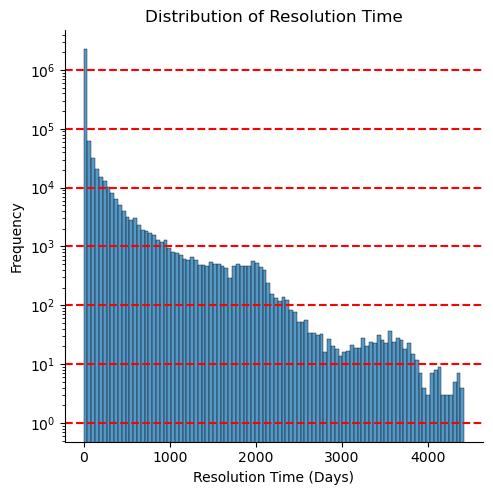

In [11]:
# Plot distribution of resolution time
plt.figure(figsize=(12,8))
sns.displot(df.resolution_time, bins=100)
plt.title('Distribution of Resolution Time')
plt.xlabel('Resolution Time (Days)')
plt.ylabel('Frequency')
# log scale on x-axis and y-axis
plt.yscale('log')
# Y scale max value will be upper bounded by the max value in the data
y_max = df.shape[0]
# GET log 10 of y_max
y_max_log = np.log10(y_max)
# round up to nearest integer
y_max_log = np.ceil(y_max_log)
for i in range(int(y_max_log)):
    # plot horizontal lines at each power of 10
    plt.axhline(y=10**i, color='r', linestyle='--')
plt.show()

Seems that around 50% of time issues are resolved within a day.

In [12]:
df['longitude_rounded'] = df.longitude.round(0)
df['latitude_rounded'] = df.latitude.round(0)

# Drop rows with latitude rounded to 0
df = df[df.latitude_rounded != 0]

# Drop rows with longitude rounded to 0
df = df[df.longitude_rounded != 0]

df.shape

(2484489, 34)

<Figure size 1000x1000 with 0 Axes>

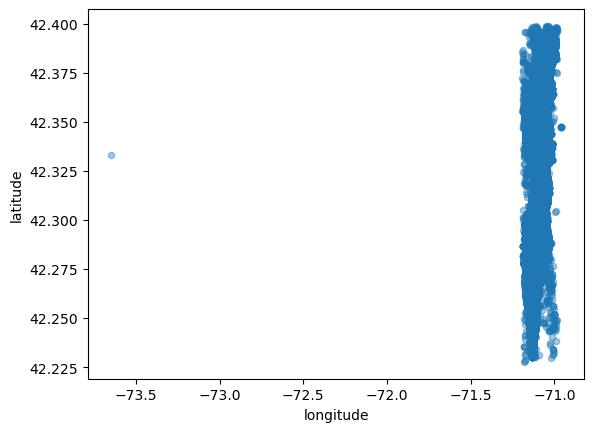

In [13]:
# plot a map of the latitudes and longitudes
plt.figure(figsize=(10,10))
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)
plt.show()

In [14]:
# Drop the one request with a longitude less that -73
df = df[df.longitude > -73]

<Figure size 1000x1000 with 0 Axes>

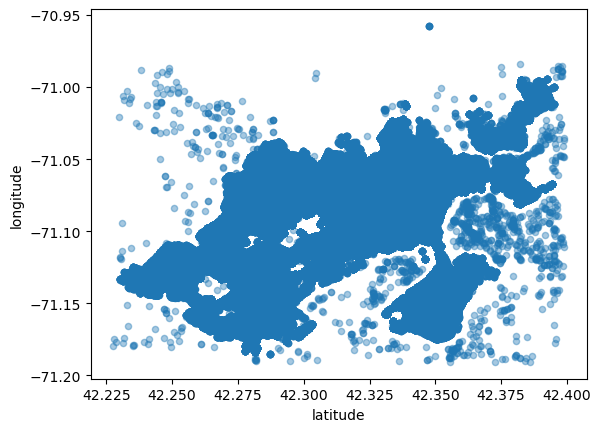

In [15]:
# replot
plt.figure(figsize=(10,10))
df.plot(kind="scatter", x="latitude", y="longitude", alpha=0.4)
plt.show()

In [16]:
# Calculate the average longitude and latitude for downtown
mean_boston_longitude = df[df['neighborhood'] == 'Boston'].longitude.mean()
mean_boston_latitude = df[df['neighborhood'] == 'Boston'].latitude.mean()

import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    dLat = np.radians(lat2 - lat1)
    dLon = np.radians(lon2 - lon1)
    a = np.sin(dLat/2) * np.sin(dLat/2) + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dLon/2) * np.sin(dLon/2)
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

# Add new feature defining distance from Boston
df['distance_from_boston'] = df.apply(lambda row: haversine(mean_boston_latitude, mean_boston_longitude, row['latitude'], row['longitude']), axis=1)

C:\Users\kmfoc\AppData\Local\Temp\ipykernel_9412\1358419866.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance_from_boston'] = df.apply(lambda row: haversine(mean_boston_latitude, mean_boston_longitude, row['latitude'], row['longitude']), axis=1)


In [17]:
df['distance_from_boston'].describe()

count   2484488.00
mean          4.82
std           3.15
min           0.06
25%           2.16
50%           4.17
75%           6.93
max          16.61
Name: distance_from_boston, dtype: float64

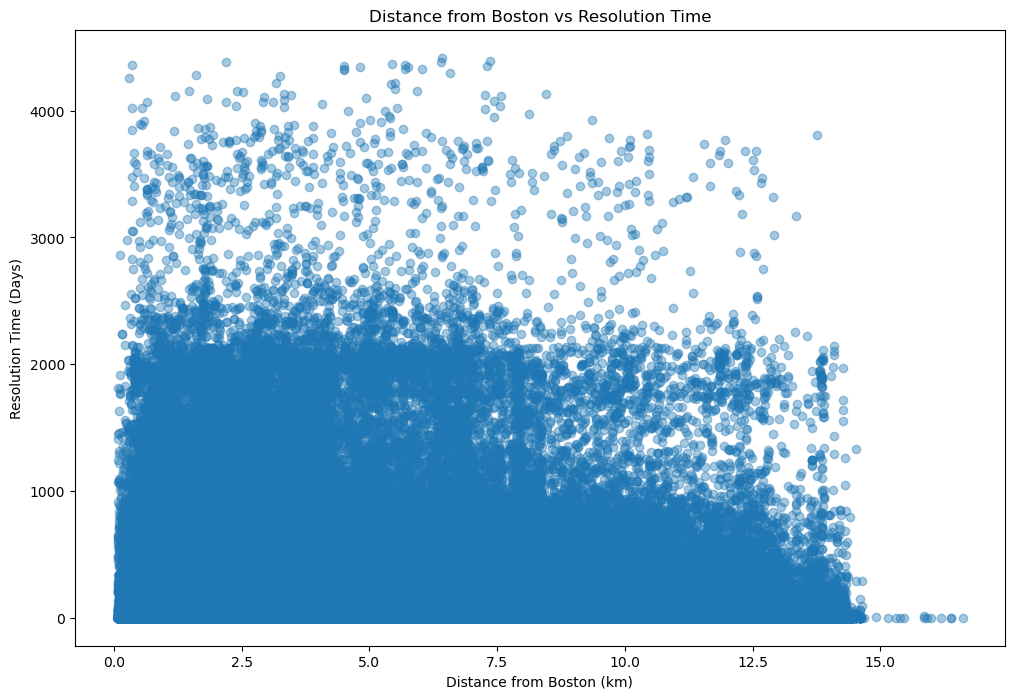

In [18]:
# Scatter plot of distance from Boston vs resolution time
plt.figure(figsize=(12,8))
plt.scatter(df.distance_from_boston, df.resolution_time, alpha=0.4)
plt.title('Distance from Boston vs Resolution Time')
plt.xlabel('Distance from Boston (km)')
plt.ylabel('Resolution Time (Days)')
plt.show()

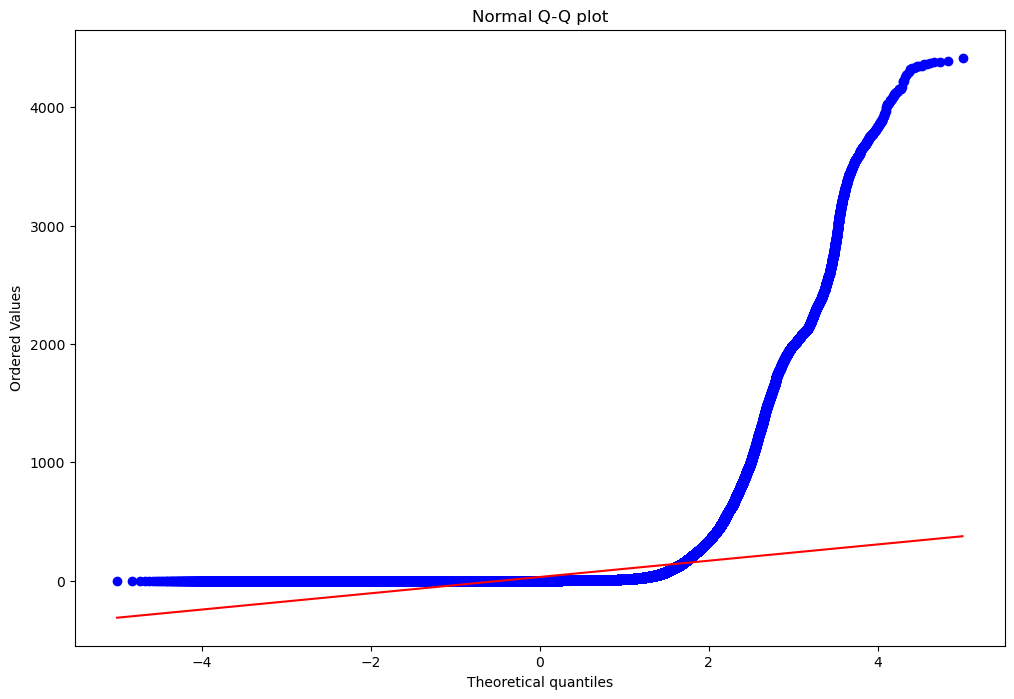

In [19]:
import scipy.stats as stats

# Q-Q plot of distance from Boston
plt.figure(figsize=(12,8))
stats.probplot(df.resolution_time, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()


In [20]:
# log transform resolution time
df['log_resolution_time'] = np.log(df.resolution_time + 0.0000001)


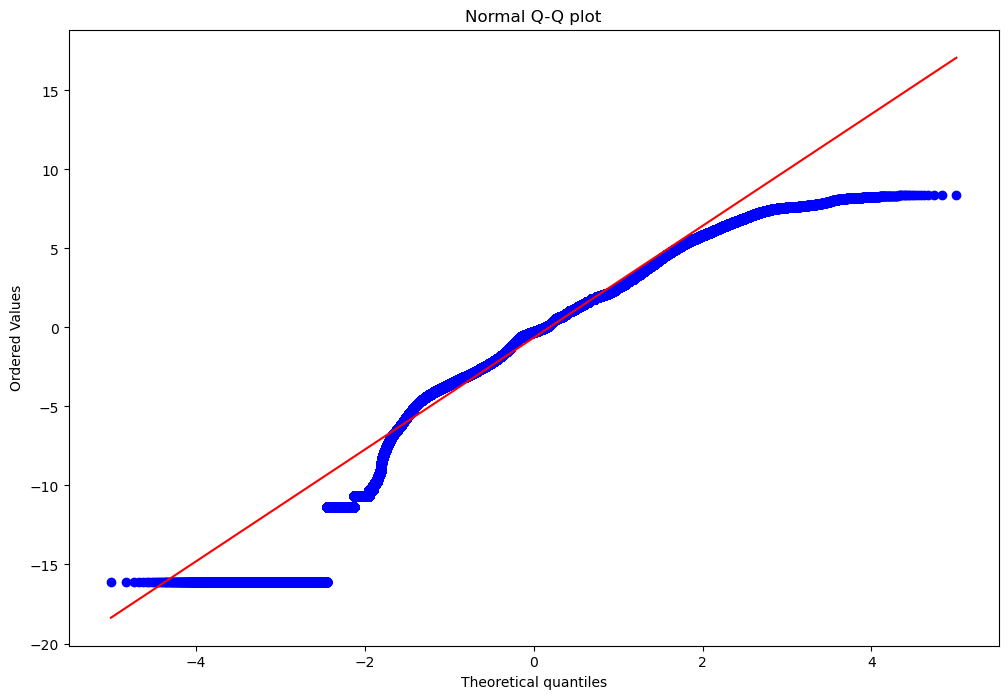

In [21]:
# Q-Q plot of log transformed resolution time
plt.figure(figsize=(12,8))
stats.probplot(df.log_resolution_time, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [22]:
# Load SVI data
svi = pd.read_csv("../../data/Climate_Ready_Boston_Social_Vulnerability.csv")
svi.head()

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Name,Shape__Area,Shape__Length
0,1,25025010405,3914567.54,89.87,5522,994,470,60,331,1191,1522,1755,2131.22,Mission Hill,666100.00,6036.19
1,2,25025010404,1472713.92,33.81,5817,1862,299,77,56,2387,2443,1749,2201.14,Fenway,250612.38,2176.59
2,3,25025010801,1376667.12,31.60,2783,1899,84,281,390,72,462,447,1214.76,Back Bay,234357.91,2542.04
3,4,25025010702,3228780.12,74.12,2400,1643,45,86,285,187,472,320,1014.20,Back Bay,549614.01,3224.57
4,5,25025010204,2741497.18,62.94,3173,1283,131,13,36,895,931,1039,1181.78,Fenway,466585.24,3143.61


In [23]:
svi.isnull().sum()

FID              0
GEOID10          0
AREA_SQFT        0
AREA_ACRES       0
POP100_RE        0
HU100_RE         0
TotDis           0
TotChild         0
OlderAdult       0
Low_to_No        0
LEP              0
POC2             0
MedIllnes        0
Name             0
Shape__Area      0
Shape__Length    0
dtype: int64

In [25]:
# group by neighborhood
svi_grouped = svi.groupby('Name').sum().reset_index()
svi_grouped.head()

,Name,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Shape__Area,Shape__Length
0,Allston,18,50050001407,4496898.63,103.23,7592,3823,400,173,144,3300,3444,3011,2831.85,765446.73,5922.98
1,Back Bay,597,275277067915,34093613.71,782.68,28634,18365,1892,1686,3759,5316,9075,6923,11842.96,5803906.99,67191.05
2,Bay Village,360,75075210902,9390969.04,215.59,10850,5076,1122,1249,1711,3929,5640,6008,4292.93,1598363.18,10057.15
3,Brighton,1104,350350006124,101341223.66,2326.47,60821,27143,5502,4244,5847,17067,22914,19768,23936.80,17249837.64,78759.27
4,Charlestown,821,150150242402,37683440.08,865.09,16439,8648,1535,3301,1811,4157,5968,3981,6461.47,6420147.65,47678.44


In [27]:
target_indices = ["POP100_RE", "HU100_RE", "TotDis", "TotChild", "OlderAdult", "Low_to_No", "LEP", "POC2", "MedIllnes"]

# Normalize by area
for col in target_indices:
    # CReate new column name
    new_col = col + '_norm_acres'
    # Normalize by area
    svi_grouped[new_col] = svi_grouped[col] / svi_grouped['AREA_ACRES']

# Normalize by population
for col in target_indices:
    # CReate new column name
    new_col = col + '_norm_pop'
    # Normalize by area
    svi_grouped[new_col] = svi_grouped[col] / svi_grouped['POP100_RE']

svi_grouped.head()

,Name,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Shape__Area,Shape__Length,POP100_RE_norm_acres,HU100_RE_norm_acres,TotDis_norm_acres,TotChild_norm_acres,OlderAdult_norm_acres,Low_to_No_norm_acres,LEP_norm_acres,POC2_norm_acres,MedIllnes_norm_acres,POP100_RE_norm_pop,HU100_RE_norm_pop,TotDis_norm_pop,TotChild_norm_pop,OlderAdult_norm_pop,Low_to_No_norm_pop,LEP_norm_pop,POC2_norm_pop,MedIllnes_norm_pop
0,Allston,18,50050001407,4496898.63,103.23,7592,3823,400,173,144,3300,3444,3011,2831.85,765446.73,5922.98,73.54,37.03,3.87,1.68,1.39,31.97,33.36,29.17,27.43,1.00,0.50,0.05,0.02,0.02,0.43,0.45,0.40,0.37
1,Back Bay,597,275277067915,34093613.71,782.68,28634,18365,1892,1686,3759,5316,9075,6923,11842.96,5803906.99,67191.05,36.58,23.46,2.42,2.15,4.80,6.79,11.59,8.85,15.13,1.00,0.64,0.07,0.06,0.13,0.19,0.32,0.24,0.41
2,Bay Village,360,75075210902,9390969.04,215.59,10850,5076,1122,1249,1711,3929,5640,6008,4292.93,1598363.18,10057.15,50.33,23.55,5.20,5.79,7.94,18.22,26.16,27.87,19.91,1.00,0.47,0.10,0.12,0.16,0.36,0.52,0.55,0.40
3,Brighton,1104,350350006124,101341223.66,2326.47,60821,27143,5502,4244,5847,17067,22914,19768,23936.80,17249837.64,78759.27,26.14,11.67,2.36,1.82,2.51,7.34,9.85,8.50,10.29,1.00,0.45,0.09,0.07,0.10,0.28,0.38,0.33,0.39
4,Charlestown,821,150150242402,37683440.08,865.09,16439,8648,1535,3301,1811,4157,5968,3981,6461.47,6420147.65,47678.44,19.00,10.00,1.77,3.82,2.09,4.81,6.90,4.60,7.47,1.00,0.53,0.09,0.20,0.11,0.25,0.36,0.24,0.39


In [29]:
svi_grouped.Name.unique()

array(['Allston', 'Back Bay', 'Bay Village', 'Brighton', 'Charlestown',
       'Dorchester', 'East Boston', 'Fenway', 'Harbor Islands',
       'Hyde Park', 'Jamaica Plain', 'Leather District',
       'Longwood Medical Area', 'Mattapan', 'Mission Hill', 'North End',
       'Roslindale', 'Roxbury', 'South Boston', 'South Boston Waterfront',
       'South End', 'West End', 'West Roxbury'], dtype=object)

In [30]:
df.neighborhood.unique()

array(['Greater Mattapan', 'Roslindale', 'West Roxbury', 'Hyde Park',
       'Dorchester', 'Jamaica Plain',
       'Fenway / Kenmore / Audubon Circle / Longwood', 'Roxbury',
       'South Boston / South Boston Waterfront', 'Back Bay',
       'Allston / Brighton', 'East Boston',
       'Downtown / Financial District', 'Boston', 'Charlestown',
       'Beacon Hill', 'South End', 'Mission Hill', 'Allston', 'Brighton',
       'South Boston', 'Mattapan', 'No Neighborhood', 'Chestnut Hill'],
      dtype=object)

In [34]:
# Get a dictionary of median resolution time by neighborhood, from the original dataframe
median_resolution_time_by_neighborhood = df.groupby('neighborhood').resolution_time.median().to_dict()

# Map
name_to_neighborhood_map = {
    'Mission Hill': 'Mission Hill',
    'Fenway': 'Fenway / Kenmore / Audubon Circle / Longwood',
    'Back Bay': 'Back Bay',
    'Allston': 'Allston / Brighton',
    'Brighton': 'Allston / Brighton',
    'Jamaica Plain': 'Jamaica Plain',
    'Roslindale': 'Roslindale',
    'Hyde Park': 'Hyde Park',
    'West Roxbury': 'West Roxbury',
    'Mattapan': 'Mattapan',
    'Dorchester': 'Dorchester',
    'East Boston': 'East Boston',
    'North End': 'Downtown / Financial District',
    'West End': 'Downtown / Financial District',
    'Longwood Medical Area': 'Fenway / Kenmore / Audubon Circle / Longwood',
    'Roxbury': 'Roxbury',
    'South Boston Waterfront': 'South Boston / South Boston Waterfront',
    'Charlestown': 'Charlestown',
    'South End': 'South End',
    'Bay Village': 'South End',
    'Leather District': 'Downtown / Financial District',
    'South Boston': 'South Boston / South Boston Waterfront',
    'Harbor Islands': 'South Boston / South Boston Waterfront'
}

# Add median_res_time to svi_grouped using the name_to_neighborhood_map and median_resolution_time_by_neighborhood
svi_grouped['median_res_time'] = svi_grouped.Name.map(name_to_neighborhood_map).map(median_resolution_time_by_neighborhood)
svi_grouped.head()

,Name,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Shape__Area,Shape__Length,POP100_RE_norm_acres,HU100_RE_norm_acres,TotDis_norm_acres,TotChild_norm_acres,OlderAdult_norm_acres,Low_to_No_norm_acres,LEP_norm_acres,POC2_norm_acres,MedIllnes_norm_acres,POP100_RE_norm_pop,HU100_RE_norm_pop,TotDis_norm_pop,TotChild_norm_pop,OlderAdult_norm_pop,Low_to_No_norm_pop,LEP_norm_pop,POC2_norm_pop,MedIllnes_norm_pop,median_res_time
0,Allston,18,50050001407,4496898.63,103.23,7592,3823,400,173,144,3300,3444,3011,2831.85,765446.73,5922.98,73.54,37.03,3.87,1.68,1.39,31.97,33.36,29.17,27.43,1.00,0.50,0.05,0.02,0.02,0.43,0.45,0.40,0.37,0.78
1,Back Bay,597,275277067915,34093613.71,782.68,28634,18365,1892,1686,3759,5316,9075,6923,11842.96,5803906.99,67191.05,36.58,23.46,2.42,2.15,4.80,6.79,11.59,8.85,15.13,1.00,0.64,0.07,0.06,0.13,0.19,0.32,0.24,0.41,0.64
2,Bay Village,360,75075210902,9390969.04,215.59,10850,5076,1122,1249,1711,3929,5640,6008,4292.93,1598363.18,10057.15,50.33,23.55,5.20,5.79,7.94,18.22,26.16,27.87,19.91,1.00,0.47,0.10,0.12,0.16,0.36,0.52,0.55,0.40,0.45
3,Brighton,1104,350350006124,101341223.66,2326.47,60821,27143,5502,4244,5847,17067,22914,19768,23936.80,17249837.64,78759.27,26.14,11.67,2.36,1.82,2.51,7.34,9.85,8.50,10.29,1.00,0.45,0.09,0.07,0.10,0.28,0.38,0.33,0.39,0.78
4,Charlestown,821,150150242402,37683440.08,865.09,16439,8648,1535,3301,1811,4157,5968,3981,6461.47,6420147.65,47678.44,19.00,10.00,1.77,3.82,2.09,4.81,6.90,4.60,7.47,1.00,0.53,0.09,0.20,0.11,0.25,0.36,0.24,0.39,0.83


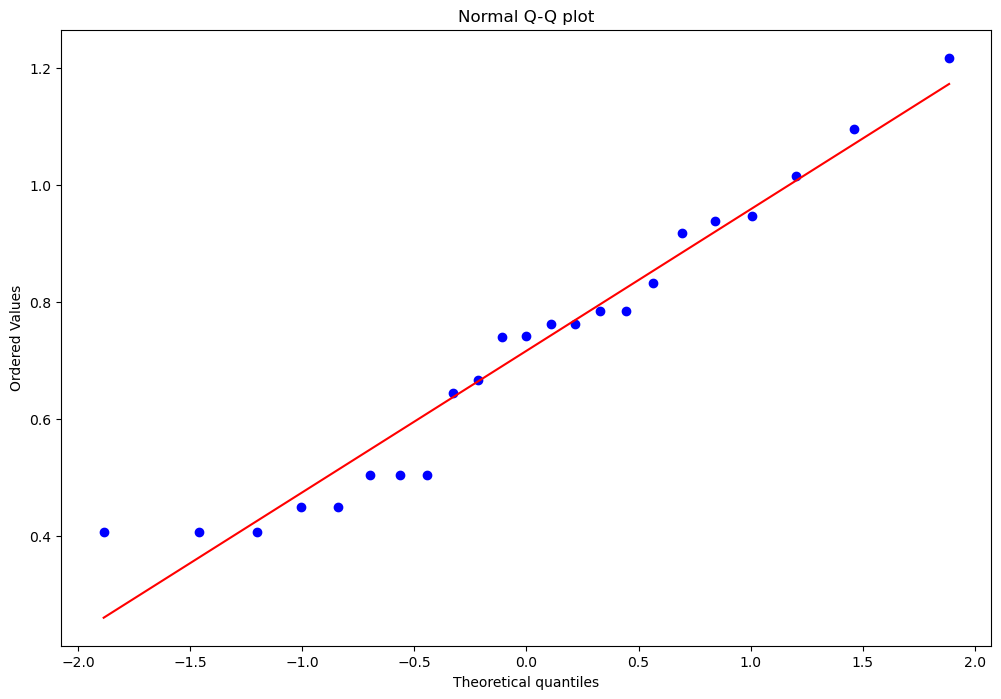

In [38]:
# QQ plot of median resolution time
plt.figure(figsize=(12,8))
stats.probplot(svi_grouped.median_res_time, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

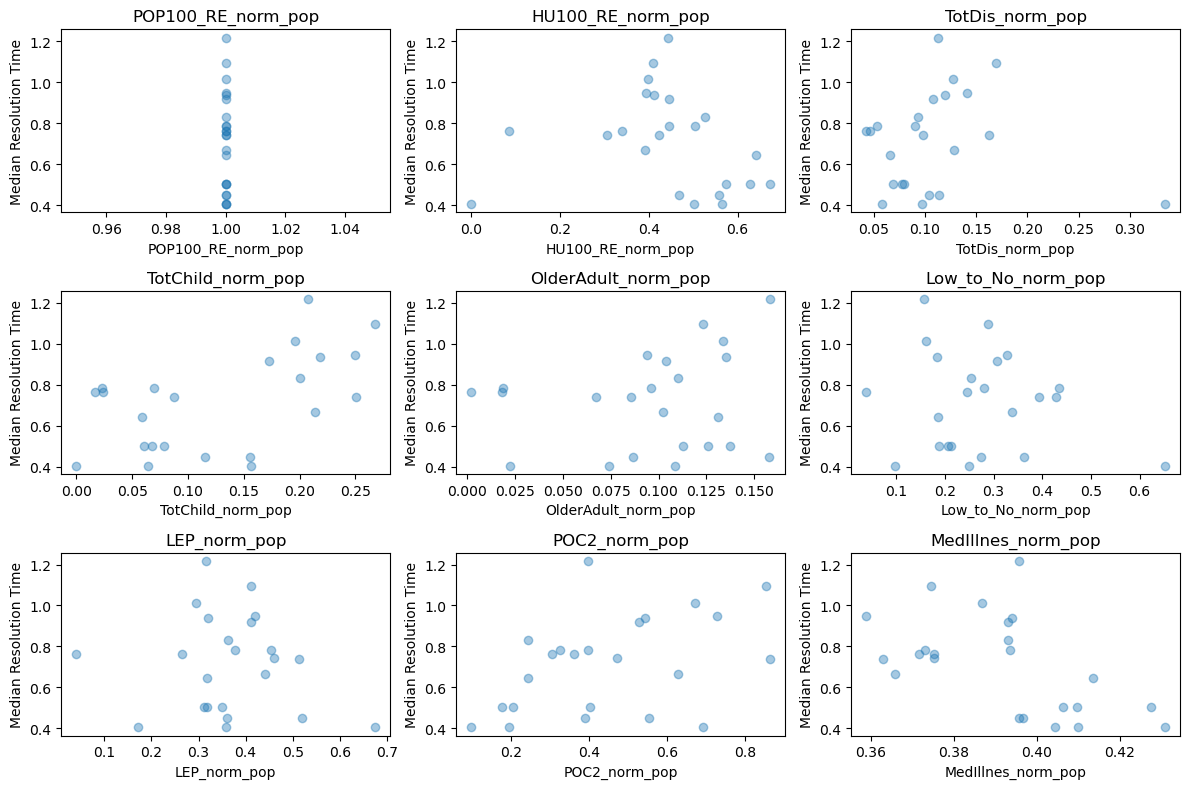

In [61]:
no_norm_vars = target_indices
area_norm_vars = [col + '_norm_acres' for col in target_indices]
pop_norm_vars = [col + '_norm_pop' for col in target_indices]

# Scatter plot all area norm vars vs median resolution time in a grid like pattern of plots
plt.figure(figsize=(12,8))
for i, col in enumerate(pop_norm_vars):
    plt.subplot(3,3,i+1)
    plt.scatter(svi_grouped[col], svi_grouped.median_res_time, alpha=0.4)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Median Resolution Time')
plt.tight_layout()
plt.show()

                            OLS Regression Results                            
Dep. Variable:        median_res_time   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     4.737
Date:                Sun, 10 Dec 2023   Prob (F-statistic):             0.0411
Time:                        19:28:37   Log-Likelihood:                 3.3742
No. Observations:                  23   AIC:                            -2.748
Df Residuals:                      21   BIC:                           -0.4775
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5084      0.106      4.808

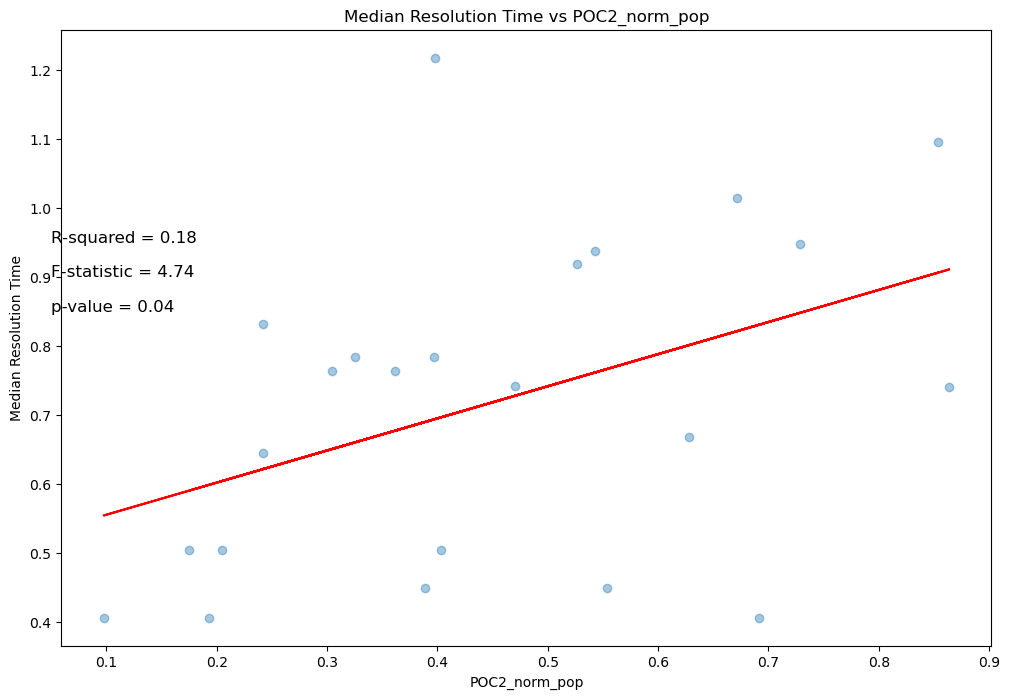

In [68]:
# Run a linear regression of median resolution time on all pop norm vars
import statsmodels.api as sm
dependent_var = 'median_res_time'
independent_vars = 'POC2_norm_pop'

X = svi_grouped[independent_vars]
y = svi_grouped[dependent_var]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

# plot
plt.figure(figsize=(12,8))
plt.scatter(X[independent_vars], y, alpha=0.4)
plt.plot(X[independent_vars], predictions, color='red')
plt.title('Median Resolution Time vs ' + independent_vars)
plt.xlabel(independent_vars)
plt.ylabel('Median Resolution Time')
# Add statistical info to plot
plt.text(0.05, 0.95, 'R-squared = %0.2f' % model.rsquared, fontsize=12)
plt.text(0.05, 0.90, 'F-statistic = %0.2f' % model.fvalue, fontsize=12)
plt.text(0.05, 0.85, 'p-value = %0.2f' % model.f_pvalue, fontsize=12)
plt.show()

In [69]:
dependent_var = 'median_res_time'
independent_vars = svi_grouped.columns.drop(dependent_var)  # Assuming 'svi_grouped' contains all columns

good_vars = []
results_summary = []

for var in independent_vars:
    try:
        X = svi_grouped[var]
        y = svi_grouped[dependent_var]
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()

        # Store summary information
        summary = {
            'Variable': var,
            'R-squared': model.rsquared,
            'F-statistic': model.fvalue,
            'p-value': model.f_pvalue
        }
        results_summary.append(summary)

        # Criteria for a good variable
        if model.f_pvalue < 0.05:
            good_vars.append(var)
    except:
        print("Error with variable: " + var)
        continue

# Print summary of results
for summary in results_summary:
    print(summary)

# Print good variables
print("Good Variables:")
print(good_vars)

Error with variable: Name
{'Variable': 'FID', 'R-squared': 0.0157160664059941, 'F-statistic': 0.3353071032265858, 'p-value': 0.5687105379368271}
{'Variable': 'GEOID10', 'R-squared': 0.12620796651793909, 'F-statistic': 3.033178600078337, 'p-value': 0.09620875195376012}
{'Variable': 'AREA_SQFT', 'R-squared': 0.3033870133976031, 'F-statistic': 9.145863490750695, 'p-value': 0.006454231628804446}
{'Variable': 'AREA_ACRES', 'R-squared': 0.30338700235099547, 'F-statistic': 9.145863012709764, 'p-value': 0.0064542327969631325}
{'Variable': 'POP100_RE', 'R-squared': 0.19642231601158144, 'F-statistic': 5.133129899489168, 'p-value': 0.03416776768578638}
{'Variable': 'HU100_RE', 'R-squared': 0.14187232233102065, 'F-statistic': 3.4718828520302076, 'p-value': 0.07646624217622931}
{'Variable': 'TotDis', 'R-squared': 0.18596640004560472, 'F-statistic': 4.797460941632489, 'p-value': 0.039927495428844086}
{'Variable': 'TotChild', 'R-squared': 0.2074936074024396, 'F-statistic': 5.4982089685980995, 'p-valu

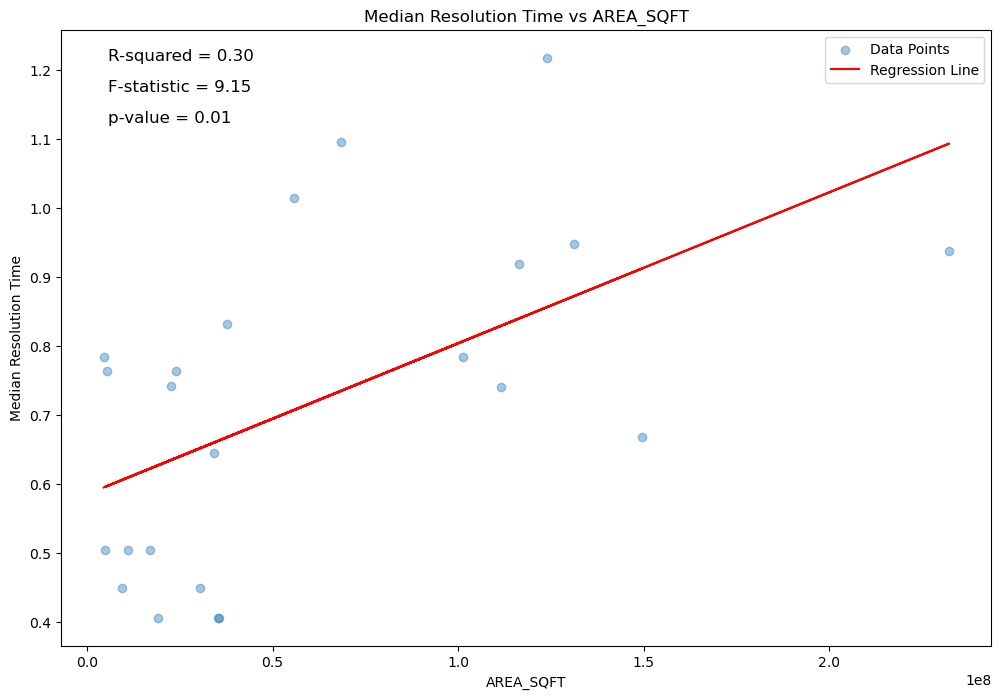

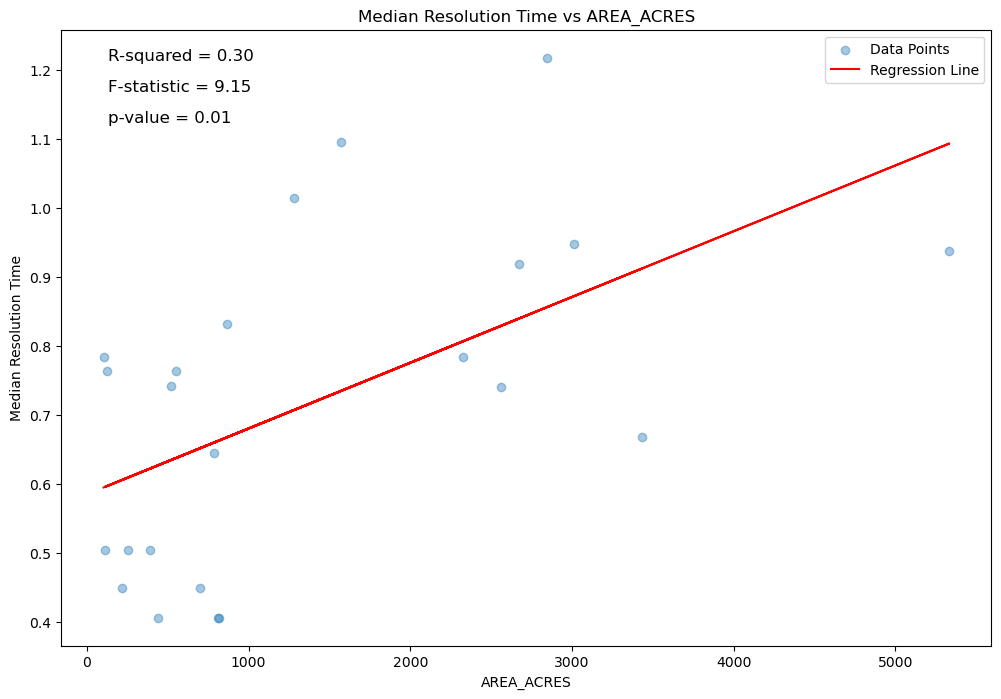

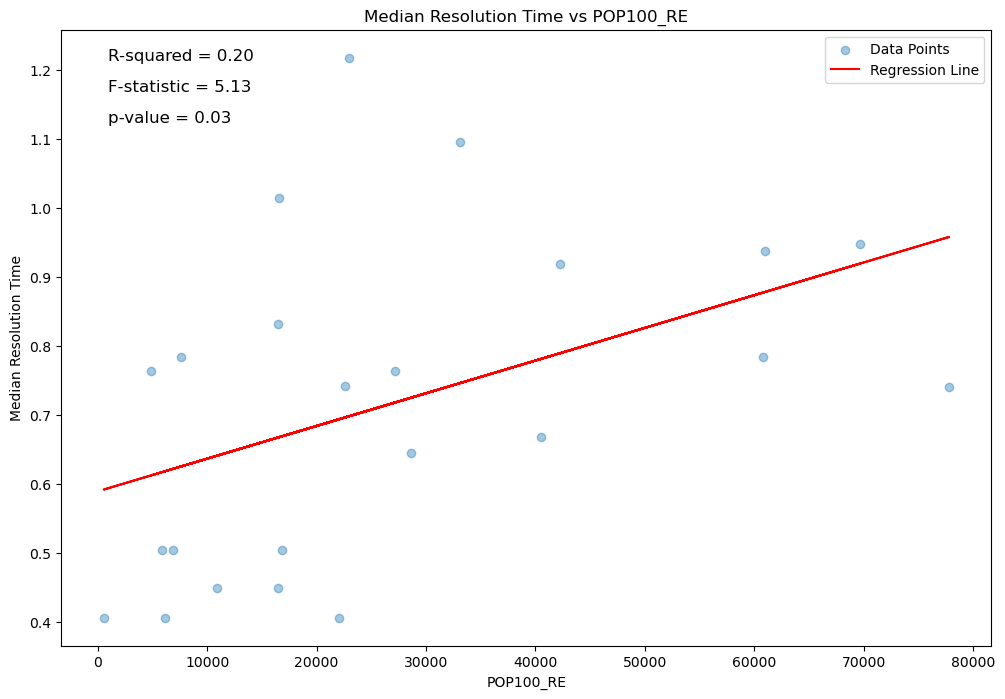

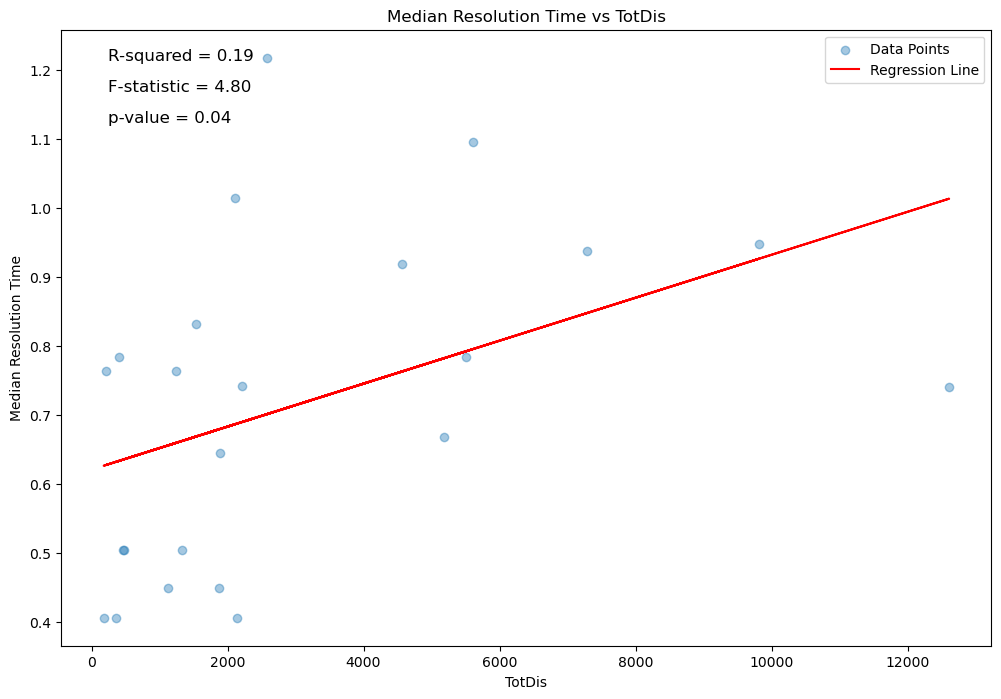

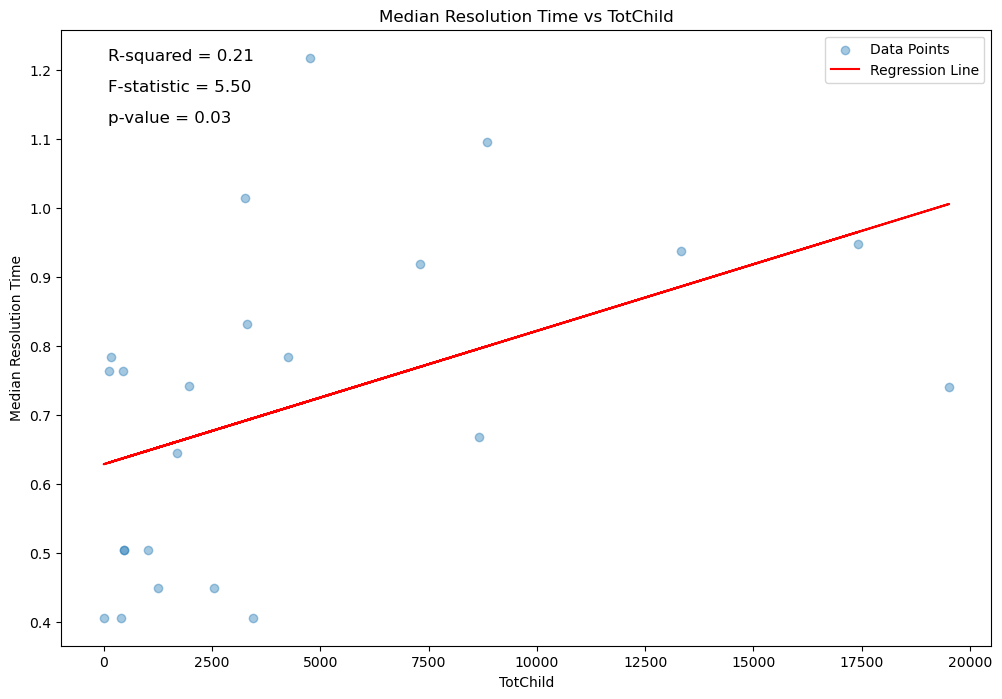

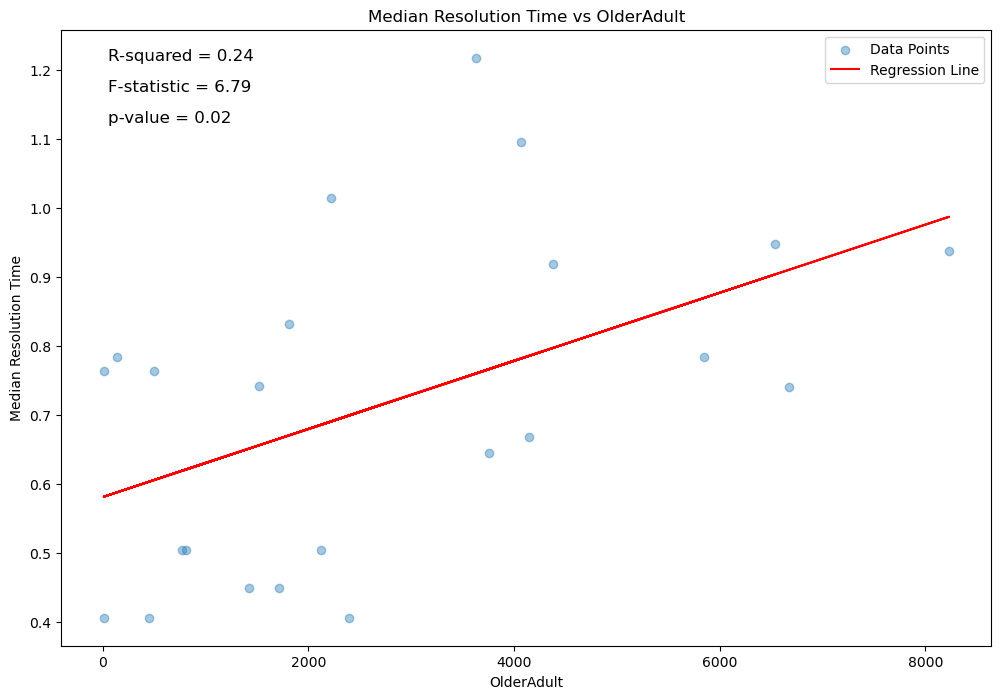

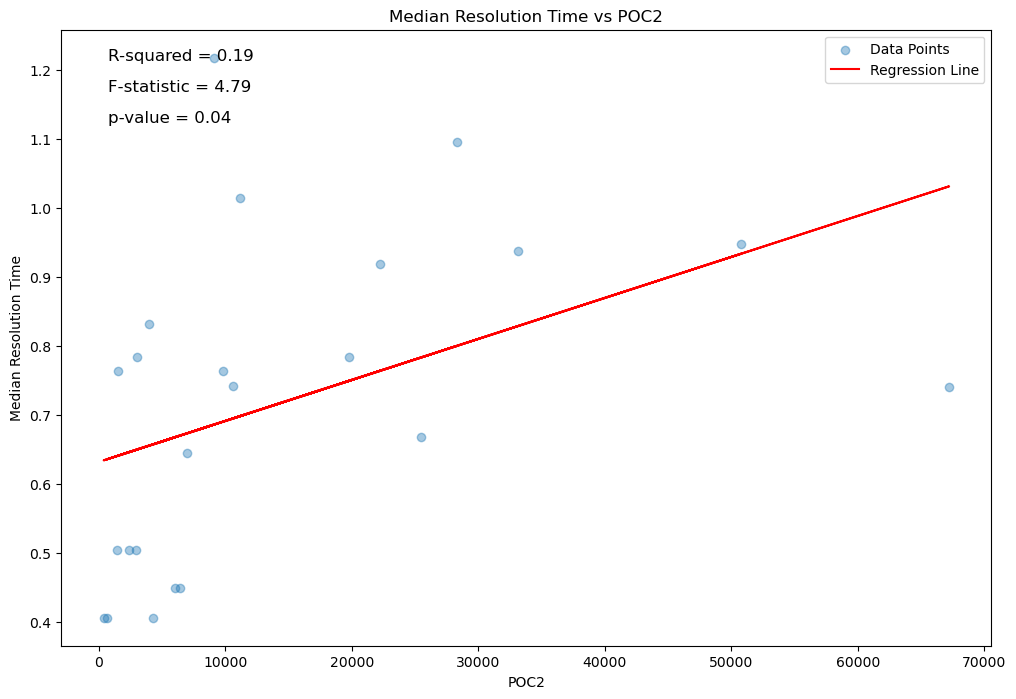

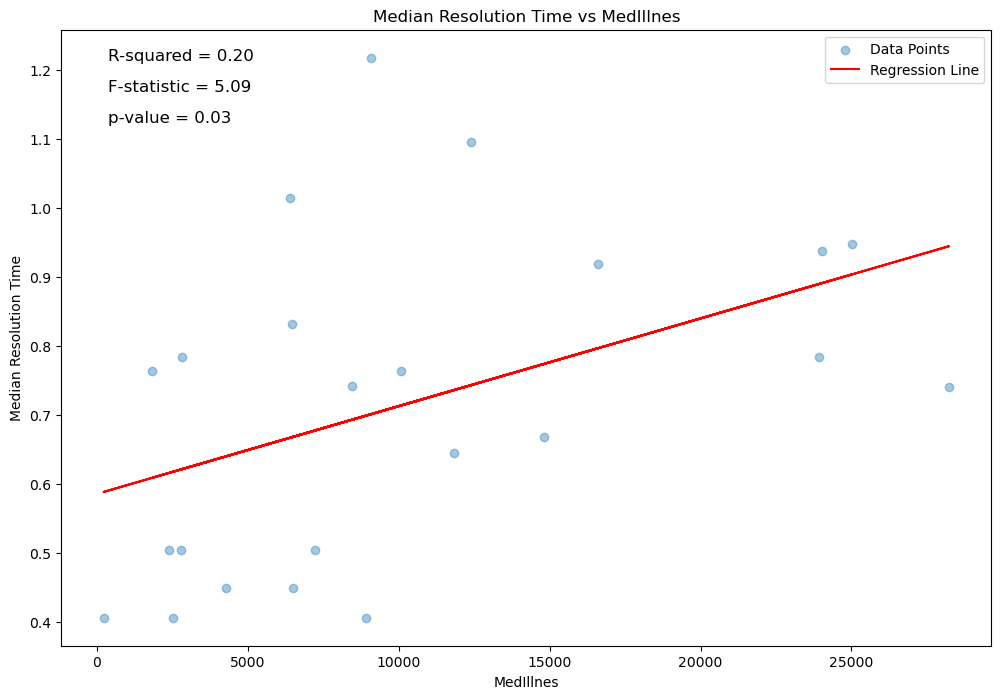

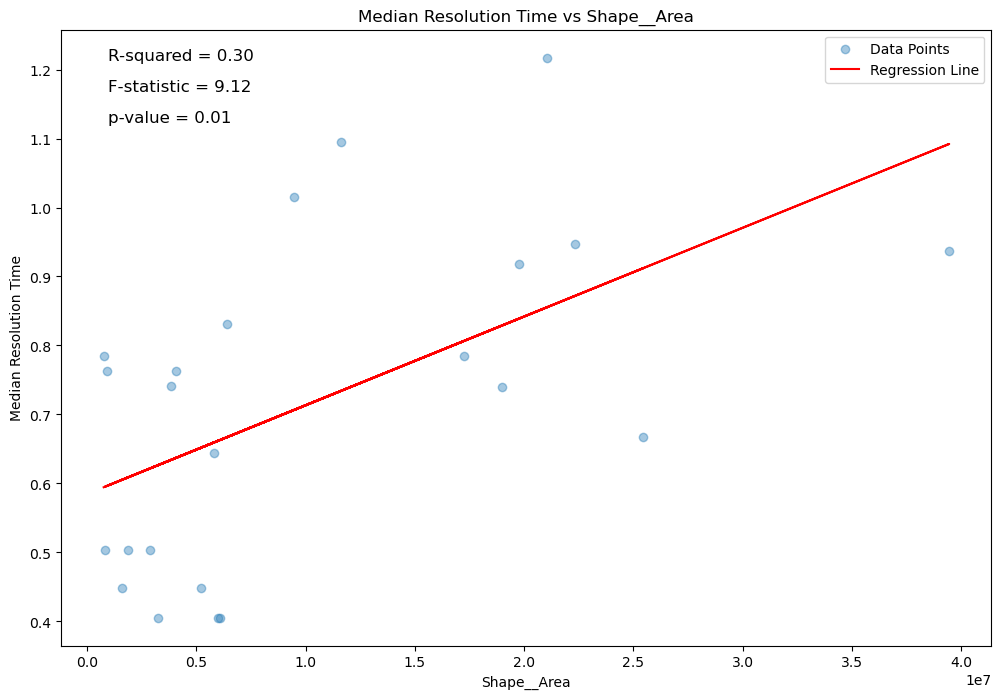

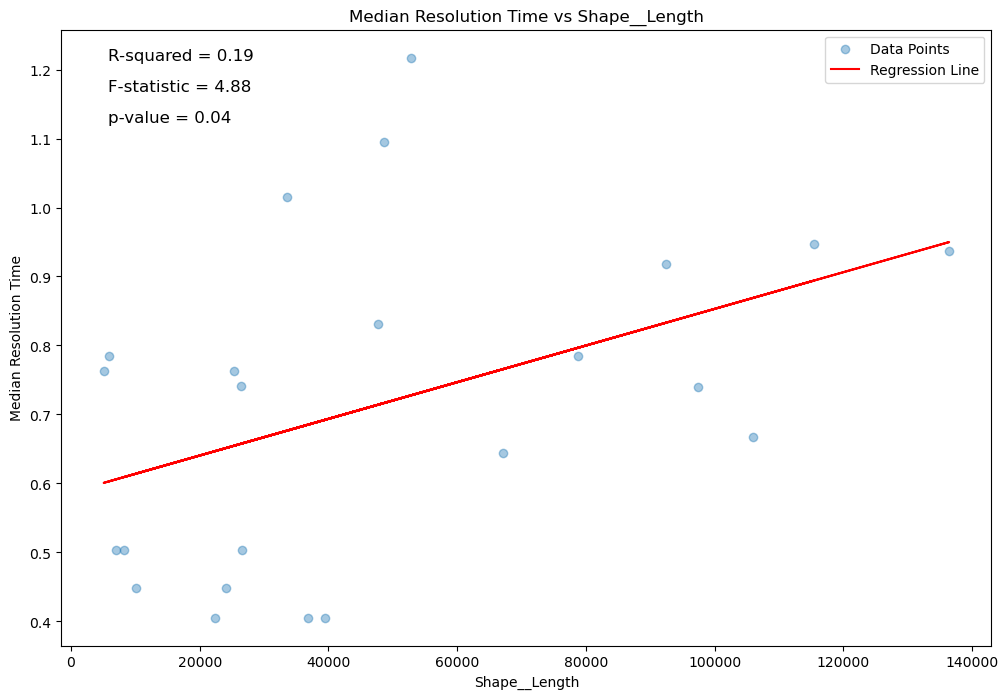

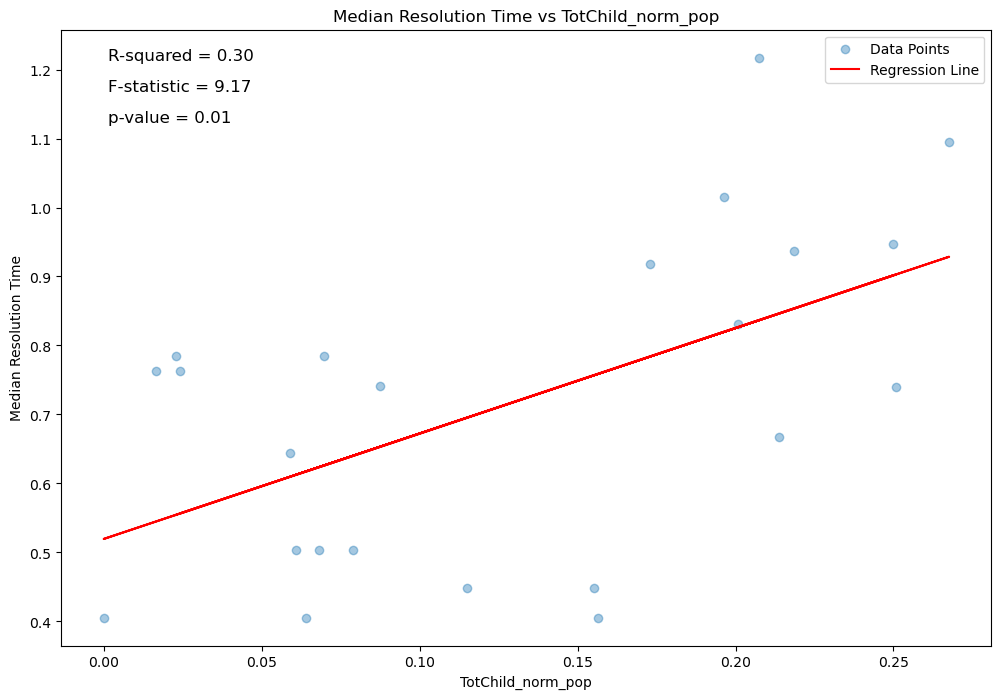

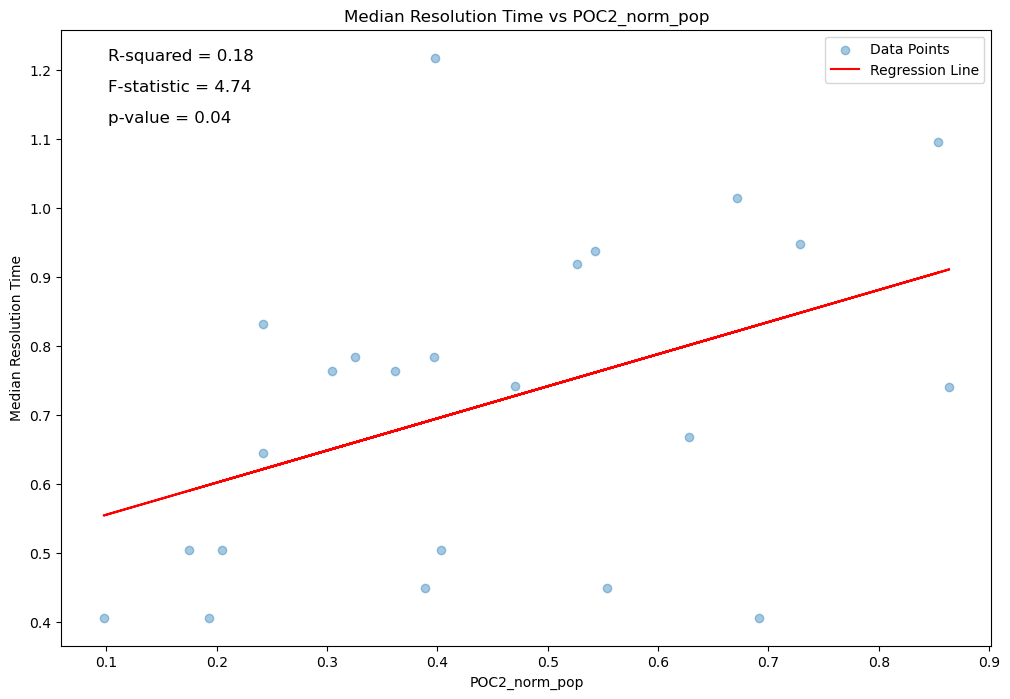

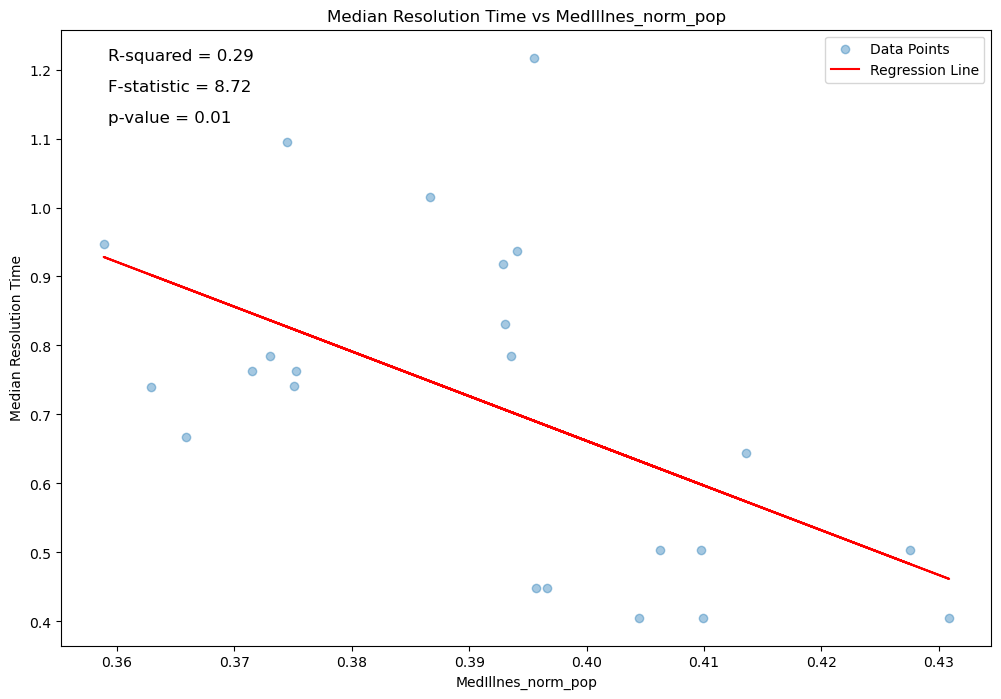

In [70]:
for var in good_vars:
    X = svi_grouped[var]
    y = svi_grouped[dependent_var]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)

    # Plotting
    plt.figure(figsize=(12, 8))
    plt.scatter(X[var], y, alpha=0.4, label='Data Points')
    plt.plot(X[var], predictions, color='red', label='Regression Line')
    plt.title(f'Median Resolution Time vs {var}')
    plt.xlabel(var)
    plt.ylabel('Median Resolution Time')

    # Adding statistical info to the plot
    plt.text(0.05, 0.95, f'R-squared = {model.rsquared:.2f}', fontsize=12, transform=plt.gca().transAxes)
    plt.text(0.05, 0.90, f'F-statistic = {model.fvalue:.2f}', fontsize=12, transform=plt.gca().transAxes)
    plt.text(0.05, 0.85, f'p-value = {model.f_pvalue:.2f}', fontsize=12, transform=plt.gca().transAxes)

    plt.legend()
    plt.show()

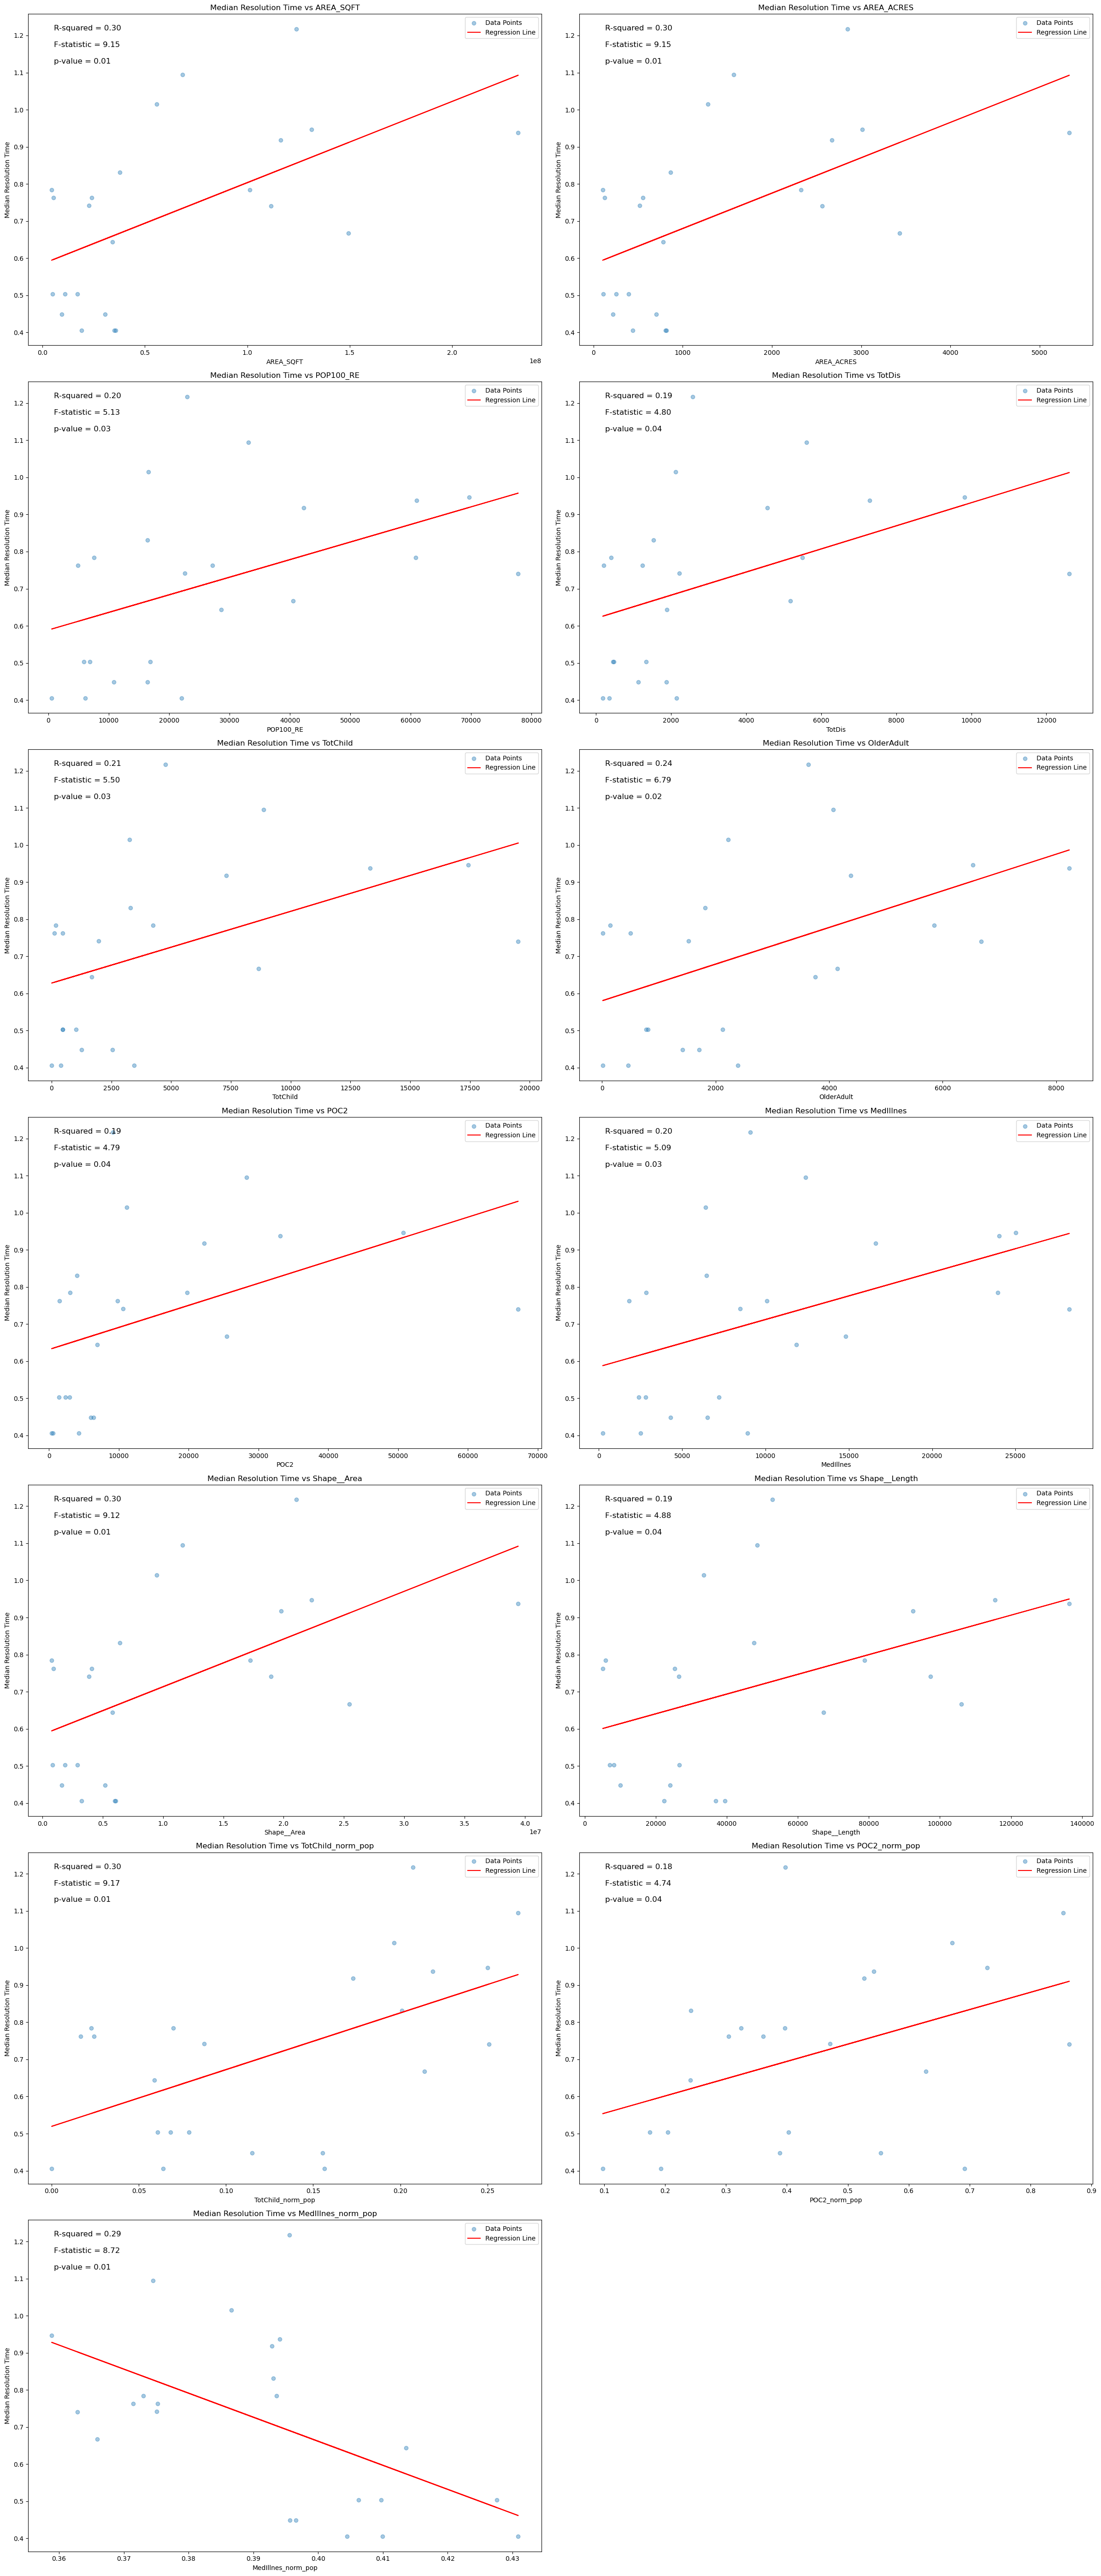

In [71]:
import math

# Calculate the number of rows needed for the subplot
num_vars = len(good_vars)
num_cols = 2
num_rows = math.ceil(num_vars / num_cols)

plt.figure(figsize=(12 * num_cols, 8 * num_rows))

# Iterate through each good variable and create a subplot
for i, var in enumerate(good_vars):
    X = svi_grouped[var]
    y = svi_grouped[dependent_var]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)

    # Create subplot
    ax = plt.subplot(num_rows, num_cols, i + 1)
    ax.scatter(X[var], y, alpha=0.4, label='Data Points')
    ax.plot(X[var], predictions, color='red', label='Regression Line')
    ax.set_title(f'Median Resolution Time vs {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Median Resolution Time')

    # Adding statistical info to the subplot
    ax.text(0.05, 0.95, f'R-squared = {model.rsquared:.2f}', fontsize=12, transform=ax.transAxes)
    ax.text(0.05, 0.90, f'F-statistic = {model.fvalue:.2f}', fontsize=12, transform=ax.transAxes)
    ax.text(0.05, 0.85, f'p-value = {model.f_pvalue:.2f}', fontsize=12, transform=ax.transAxes)

    ax.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [72]:
good_vars

['AREA_SQFT',
 'AREA_ACRES',
 'POP100_RE',
 'TotDis',
 'TotChild',
 'OlderAdult',
 'POC2',
 'MedIllnes',
 'Shape__Area',
 'Shape__Length',
 'TotChild_norm_pop',
 'POC2_norm_pop',
 'MedIllnes_norm_pop']

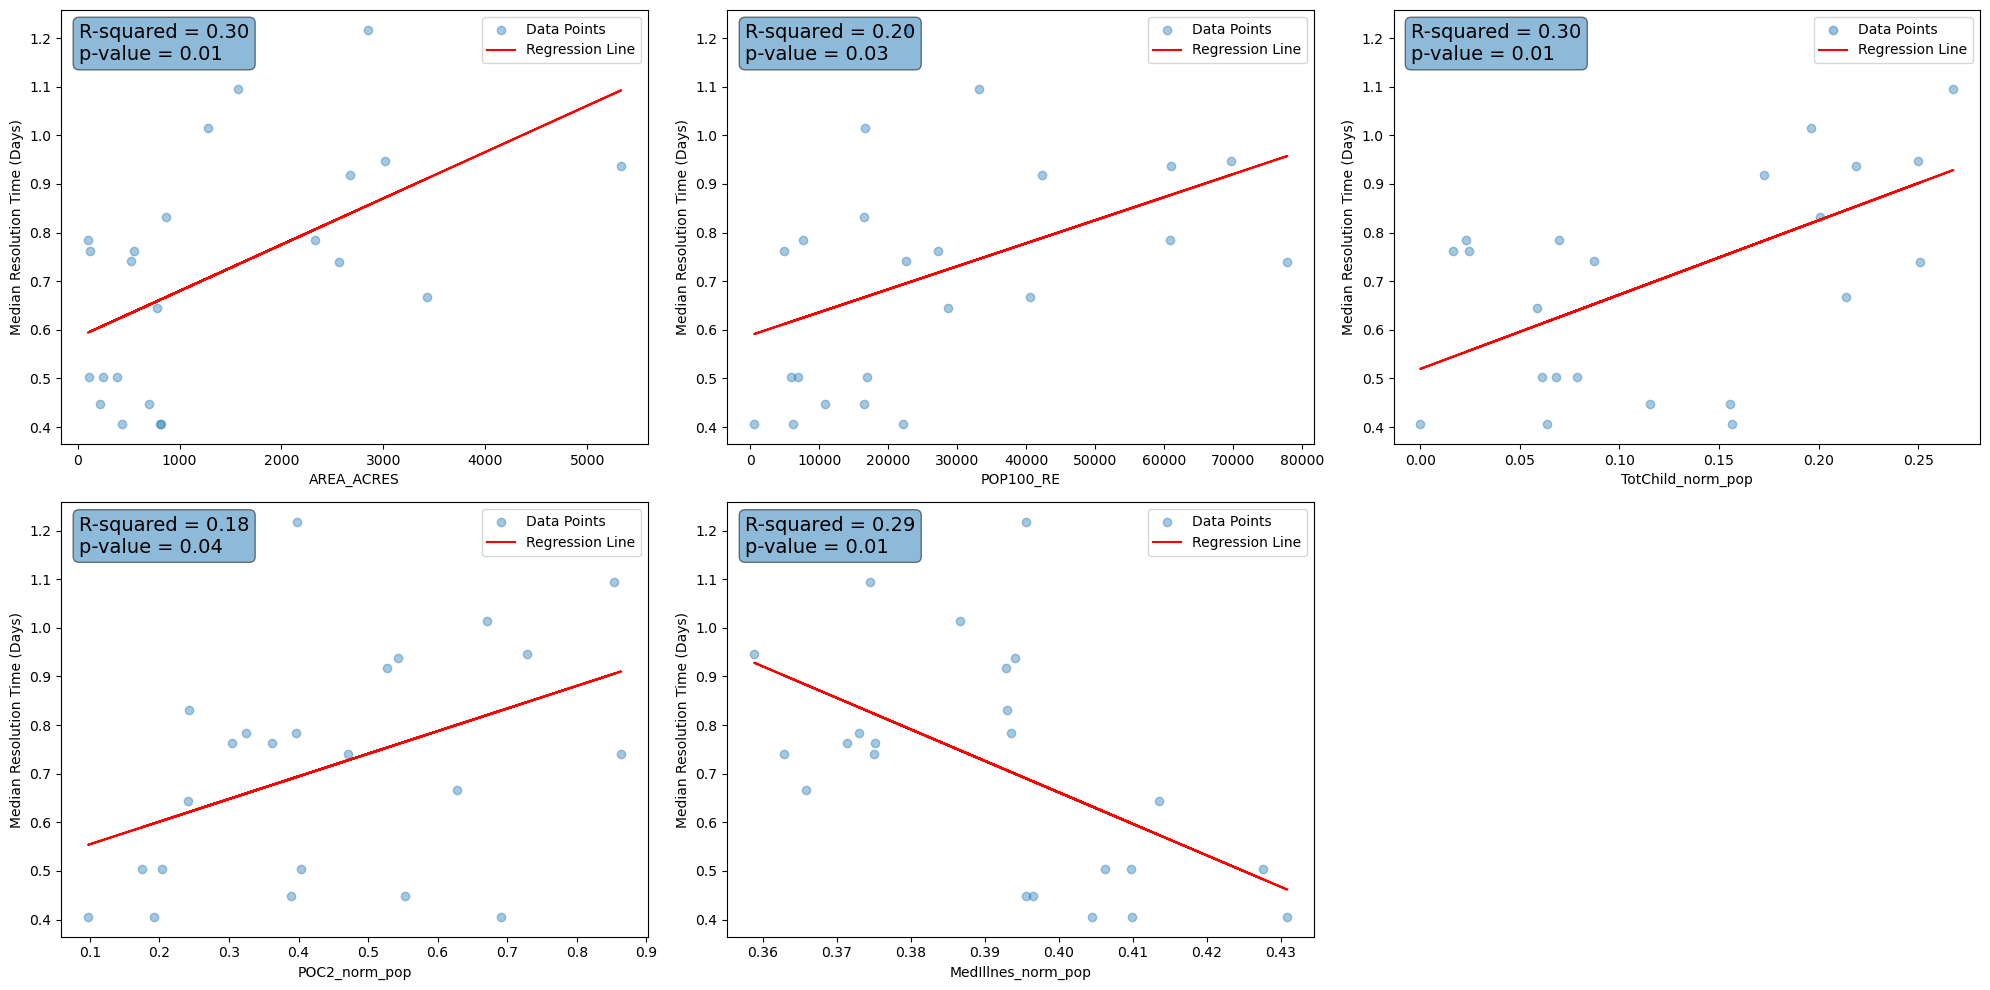

In [102]:
dependent_var = 'median_res_time'
selected_vars = ['AREA_ACRES', 'POP100_RE', 'TotChild_norm_pop', 'POC2_norm_pop', 'MedIllnes_norm_pop']
num_rows, num_cols = 2, 3

plt.figure(figsize=(20, 10))

for i, var in enumerate(selected_vars):
    X = svi_grouped[var]
    y = svi_grouped[dependent_var]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    predictions = model.predict(X)

    ax = plt.subplot(num_rows, num_cols, i + 1)
    ax.scatter(X[var], y, alpha=0.4, label='Data Points')
    ax.plot(X[var], predictions, color='red', label='Regression Line')
    ax.set_xlabel(var)
    ax.set_ylabel('Median Resolution Time (Days)')

    # Prepare text for the box
    textstr = f'R-squared = {model.rsquared:.2f}\np-value = {model.f_pvalue:.2f}'
    props = dict(boxstyle='round', alpha=0.5)

    # Place text box in upper left in axes coords   
    ax.text(0.03, 0.97, textstr, transform=ax.transAxes, fontsize=14,
            verticalalignment='top', horizontalalignment='left', bbox=props)



    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()